# Análise de Ações

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

https://www.infomoney.com.br/

In [2]:
# importar csv
df = pd.read_csv("VALE3.csv")

In [3]:
# Novo df
df_resumo = df[['DATA', 'FECHAMENTO']].copy()
df_resumo.columns = ['Data', 'Fechamento']

In [4]:
# Substituir vírgulas por pontos na coluna Fechamento
df_resumo['Fechamento'] = df_resumo['Fechamento'].str.replace(',', '.').astype(float)

In [5]:
# Exportar df para arquivo.csv
df_resumo.to_csv('DF_RESUMO.csv', index = False)

In [6]:
# Preço médio do papel no período
preco_medio = df_resumo['Fechamento'].mean()

In [7]:
# Preços máximo e mínimo do papel no período
preco_maximo = df_resumo['Fechamento'].max()
data_maximo = df_resumo.loc[df_resumo['Fechamento'].idxmax(), 'Data']

preco_minimo = df_resumo['Fechamento'].min()
data_minimo = df_resumo.loc[df_resumo['Fechamento'].idxmin(), 'Data']

In [8]:
print(f'1. Preço médio das ações: R$ {preco_medio:.2f}')
print(f'2. Preço máximo das ações: R$ {preco_maximo:.2f} no dia {data_maximo}')
print(f'3. Preço minimo das ações: R$ {preco_minimo:.2f} no dia {data_minimo}')

1. Preço médio das ações: R$ 70.65
2. Preço máximo das ações: R$ 90.84 no dia 26/01/2023
3. Preço minimo das ações: R$ 59.31 no dia 16/08/2023


Compra de 2k ações no 10º dia do período. Qual a posição no 70º dia? Valor total e indicativo de lucro ou prejuízo.

In [9]:
acoes_adquiridas = 2000
data_aquisicao = df_resumo.iloc[9]['Data']
preco_aquisicao = df_resumo.iloc[9]['Fechamento']

data_venda = df_resumo.iloc[69]['Data']
preco_venda = df_resumo.iloc[69]['Fechamento']

valor_investido = acoes_adquiridas * preco_aquisicao
valor_venda = acoes_adquiridas * preco_venda

lucro_prejuizo = valor_venda - valor_investido

In [10]:
print(f'4. Valor total das ações no dia 70: R$ {valor_venda:.2f}')
print(f'5. O investidor teve {"lucro" if lucro_prejuizo > 0 else "prejuizo"} de R$ {abs(lucro_prejuizo):.2f}')

4. Valor total das ações no dia 70: R$ 127000.00
5. O investidor teve prejuizo de R$ 11900.00


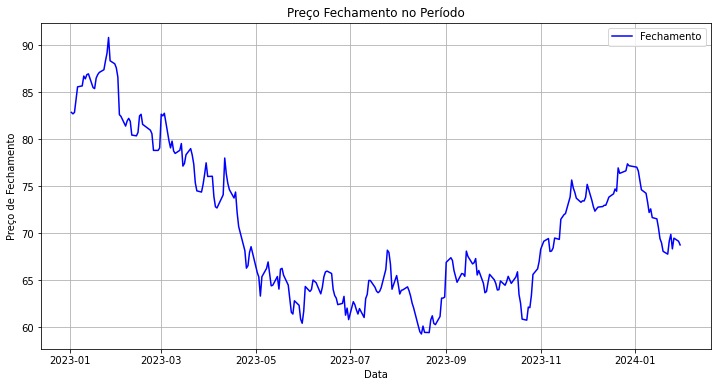

In [11]:
# Gráfico de evolução dos preços
# Converter coluna Data para o formato datetime

df_resumo['Data'] = pd.to_datetime(df_resumo['Data'], format = "%d/%m/%Y")

# Criar Gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_resumo['Data'], df_resumo['Fechamento'], label = 'Fechamento', color = 'blue')
plt.title('Preço Fechamento no Período')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()